# Algorytmy tekstowe lab1
### Norbert Wolniak

## Imports

In [510]:
import re
from datetime import datetime
import pylab
from collections import defaultdict
from statistics import mean

## Naive string matching

In [2]:
def naive_string_matching(text, pattern):
    result = []
    for s in range(0, len(text) - len(pattern) + 1):
        if pattern == text[s: s + len(pattern)]:
            result.append(s)
    return result

## Automat string matching

In [3]:
def fa_string_matching(text, delta):
    result = []
    q = 0
    length = len(delta) - 1
    for s in range(0, len(text)):
        q = delta[q][text[s]] # if not key found 0
        if q == length:
            result.append(s - q + 1)
    return result

def transmittion_table(pattern):
    result = []
    alpha = set()
    for c in pattern:
        alpha.add(c)
    for q in range(0, len(pattern) + 1):
        result.append(defaultdict(lambda : 0))
        for a in alpha:
            k = min(len(pattern) + 1, q + 2)
            while True:
                k = k - 1
                if re.search(f"{pattern[:k]}$", pattern[:q] + a):
                    break
            result[q][a] = k
    return result

## KMP algorithm

In [389]:
def kmp_string_matching(text, pattern, prefix_suffix_length_arr):
    result = []
    q = 0
    for i in range(0, len(text)):
        while q > 0 and pattern[q] is not text[i]:
            q = prefix_suffix_length_arr[q-1]
        if pattern[q] == text[i]:
            q = q + 1
        if q == len(pattern):
            result.append(i - q + 1)
            q = prefix_suffix_length_arr[q-1]
    return result
            
def prefix_suffix_function(pattern):
    prefix_suffix_length_arr = [0]
    q = 0
    for i in range(1, len(pattern)):
        while q > 0 and pattern[q] is not pattern[i]:
            q = prefix_suffix_length_arr[q-1]
        if pattern[q] == pattern[i]:
            q += 1
        prefix_suffix_length_arr.append(q)
    return prefix_suffix_length_arr

## Zad 1 Time test function

In [390]:
def algorithm_time_test(algorithm, text, pattern):
    duration = 0
    if algorithm.__name__ == "fa_string_matching":
        delta = transmittion_table(pattern)
        start = datetime.now()
        algorithm(text, delta)
        duration = datetime.now() - start
    elif algorithm.__name__ == "kmp_string_matching":
        prefix_suffix_length_arr = prefix_suffix_function(pattern)
        start = datetime.now()
        algorithm(text, pattern, prefix_suffix_length_arr)
        duration = datetime.now() - start
    elif algorithm.__name__ == "naive_string_matching":
        start = datetime.now()
        algorithm(text, pattern)
        duration = datetime.now() - start
    #print(algorithm.__name__, duration)
    return duration.total_seconds()

def preprocessing_time_test(algorithm, pattern):
    duration = 0
    if algorithm.__name__ == "fa_string_matching":
        start = datetime.now()
        delta = transmittion_table(pattern)
        duration = datetime.now() - start
    elif algorithm.__name__ == "kmp_string_matching":
        start = datetime.now()
        prefix_suffix_length_arr = prefix_suffix_function(pattern)
        duration = datetime.now() - start
    #print(algorithm.__name__, duration)
    return duration.total_seconds()

## Loading text file

In [392]:
f = open("ustawa.txt", "r", encoding="utf8")
text = f.read()
f.close()

## Zad 2 Finding all occurences of pattern "art" in the text

In [393]:
pattern = "art"

### Naive string matching algorithm

In [394]:
print(naive_string_matching(text, pattern))

[1152, 1501, 4688, 4730, 4875, 5078, 5144, 5945, 6035, 7262, 7507, 7777, 8040, 8295, 9100, 9955, 10018, 10220, 11118, 11203, 11614, 13190, 15280, 15354, 16088, 16257, 16402, 16543, 16612, 16836, 16852, 23633, 24057, 24148, 24582, 24679, 24776, 24927, 25526, 25685, 26997, 27284, 27475, 27538, 27588, 27853, 28369, 28554, 28762, 30960, 31017, 31092, 31358, 31807, 32605, 32964, 33049, 33264, 33591, 34647, 34733, 35507, 36151, 37139, 37539, 38447, 38591, 39052, 39206, 39432, 39564, 39976, 41148, 41825, 42024, 42194, 42367, 42500, 42714, 42892, 42937, 43443, 43551, 43783, 44586, 44649, 44949, 45006, 45289, 45397, 47315, 47418, 48781, 48816, 48902, 49048, 49255, 49312, 49484, 49555, 49911, 49975, 50098, 50156, 50698, 51046, 51175, 51962, 52067, 52268, 52548, 53004, 53028, 53207, 53784, 53927, 54074, 54133, 54766, 55071, 55275, 55461, 55803, 55987, 56823, 56907, 57160, 57545, 57796, 57928, 57985, 58276, 58374, 58870, 58962, 59391, 59519, 59945, 60292, 60545, 60790, 61258, 61766, 62459, 62606, 

### Automat string matching algorithm

In [395]:
print(fa_string_matching(text, transmittion_table(pattern)))

[1152, 1501, 4688, 4730, 4875, 5078, 5144, 5945, 6035, 7262, 7507, 7777, 8040, 8295, 9100, 9955, 10018, 10220, 11118, 11203, 11614, 13190, 15280, 15354, 16088, 16257, 16402, 16543, 16612, 16836, 16852, 23633, 24057, 24148, 24582, 24679, 24776, 24927, 25526, 25685, 26997, 27284, 27475, 27538, 27588, 27853, 28369, 28554, 28762, 30960, 31017, 31092, 31358, 31807, 32605, 32964, 33049, 33264, 33591, 34647, 34733, 35507, 36151, 37139, 37539, 38447, 38591, 39052, 39206, 39432, 39564, 39976, 41148, 41825, 42024, 42194, 42367, 42500, 42714, 42892, 42937, 43443, 43551, 43783, 44586, 44649, 44949, 45006, 45289, 45397, 47315, 47418, 48781, 48816, 48902, 49048, 49255, 49312, 49484, 49555, 49911, 49975, 50098, 50156, 50698, 51046, 51175, 51962, 52067, 52268, 52548, 53004, 53028, 53207, 53784, 53927, 54074, 54133, 54766, 55071, 55275, 55461, 55803, 55987, 56823, 56907, 57160, 57545, 57796, 57928, 57985, 58276, 58374, 58870, 58962, 59391, 59519, 59945, 60292, 60545, 60790, 61258, 61766, 62459, 62606, 

### KMP algorithm

In [396]:
print(kmp_string_matching(text, pattern, prefix_suffix_function(pattern)))

[1152, 1501, 4688, 4730, 4875, 5078, 5144, 5945, 6035, 7262, 7507, 7777, 8040, 8295, 9100, 9955, 10018, 10220, 11118, 11203, 11614, 13190, 15280, 15354, 16088, 16257, 16402, 16543, 16612, 16836, 16852, 23633, 24057, 24148, 24582, 24679, 24776, 24927, 25526, 25685, 26997, 27284, 27475, 27538, 27588, 27853, 28369, 28554, 28762, 30960, 31017, 31092, 31358, 31807, 32605, 32964, 33049, 33264, 33591, 34647, 34733, 35507, 36151, 37139, 37539, 38447, 38591, 39052, 39206, 39432, 39564, 39976, 41148, 41825, 42024, 42194, 42367, 42500, 42714, 42892, 42937, 43443, 43551, 43783, 44586, 44649, 44949, 45006, 45289, 45397, 47315, 47418, 48781, 48816, 48902, 49048, 49255, 49312, 49484, 49555, 49911, 49975, 50098, 50156, 50698, 51046, 51175, 51962, 52067, 52268, 52548, 53004, 53028, 53207, 53784, 53927, 54074, 54133, 54766, 55071, 55275, 55461, 55803, 55987, 56823, 56907, 57160, 57545, 57796, 57928, 57985, 58276, 58374, 58870, 58962, 59391, 59519, 59945, 60292, 60545, 60790, 61258, 61766, 62459, 62606, 

## Zad 3 Time tests

In [400]:
number_of_tests = 100
naive_algorithm_times = []
fa_algorithm_times = []
kmp_algorithm_times = []
for i in range(number_of_tests):
    naive_algorithm_times.append(algorithm_time_test(naive_string_matching, text, pattern))
    fa_algorithm_times.append(algorithm_time_test(fa_string_matching, text, pattern))
    kmp_algorithm_times.append(algorithm_time_test(kmp_string_matching, text, pattern))

<IPython.core.display.Javascript object>


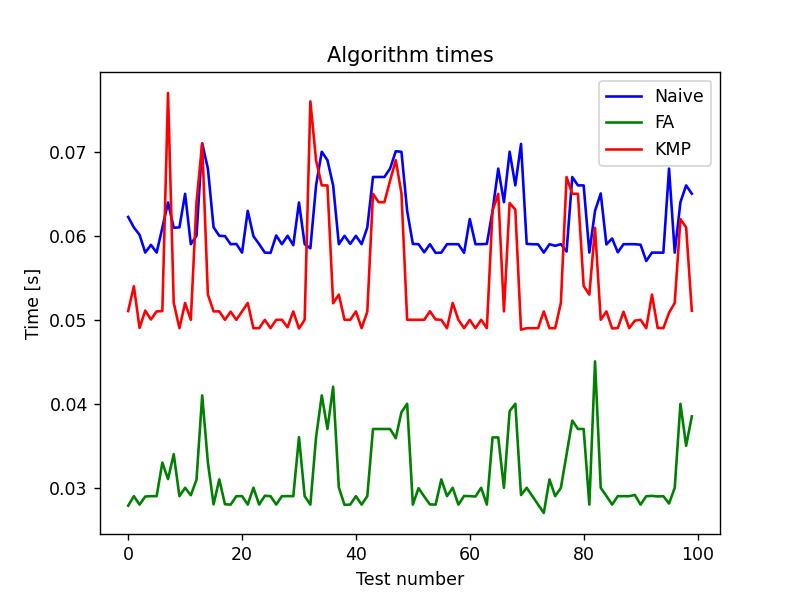

In [516]:
%matplotlib notebook
X = [i for i in range(number_of_tests)]
pylab.plot(X,naive_algorithm_times,"b", label="Naive")
pylab.plot(X,fa_algorithm_times,"g", label="FA")
pylab.plot(X,kmp_algorithm_times,"r", label="KMP")
pylab.xlabel("Test number")
pylab.ylabel("Time [s]")
pylab.title("Algorithm times")
pylab.legend(loc = "upper right")
pylab.draw()

<IPython.core.display.Javascript object>


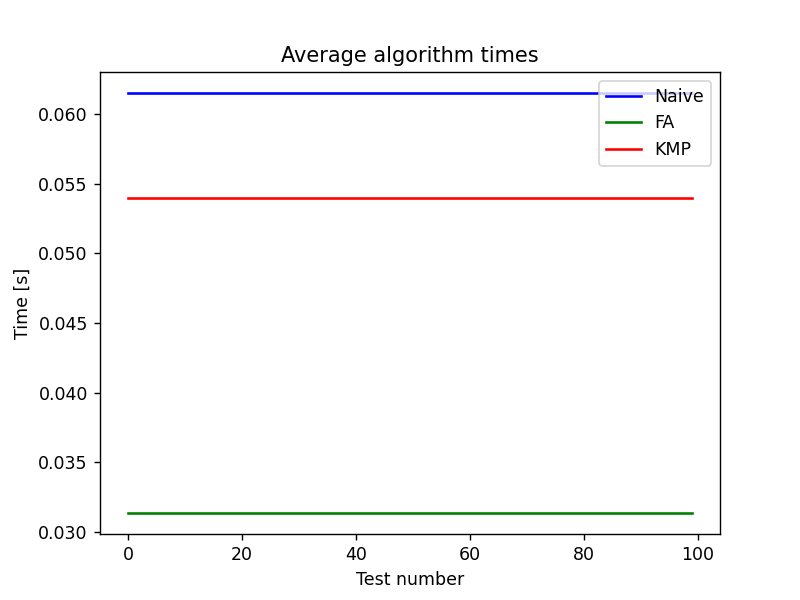

In [517]:
%matplotlib notebook

naive_algorithm_times_mean = [mean(naive_algorithm_times)]*number_of_tests
fa_algorithm_times_mean = [mean(fa_algorithm_times)]*number_of_tests
kmp_algorithm_times_mean = [mean(kmp_algorithm_times)]*number_of_tests

pylab.plot(X,naive_algorithm_times_mean,"b", label="Naive")
pylab.plot(X,fa_algorithm_times_mean,"g", label="FA")
pylab.plot(X,kmp_algorithm_times_mean,"r", label="KMP")
pylab.xlabel("Test number")
pylab.ylabel("Time [s]")
pylab.title("Average algorithm times")
pylab.legend(loc = "upper right")
pylab.draw()

## Zad 4

In [80]:
text  = ("a"*100 + "b")*200
pattern = ("a"*100 + "b")

In [84]:
print(algorithm_time_test(naive_string_matching, text, pattern))
print(algorithm_time_test(fa_string_matching, text, pattern))
print(algorithm_time_test(kmp_string_matching, text, pattern))

0.011
0.001934
0.006588


## Zad 5

In [508]:
pattern = "a"*100 + "b" + "a"*100

In [509]:
print(preprocessing_time_test(fa_string_matching, pattern))
print(preprocessing_time_test(kmp_string_matching, pattern))

0.052035
0.000999
